In [23]:
from masking import create_mask
from diffedit import prompt_2_img_diffedit
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np 
from fastdownload import FastDownload
from diffedit import prompt_2_img_diffedit
from utils import load_image

In [24]:
def plot_diffEdit(init_img, output, mask):
    ## Plotting side by side
    fig, axs = plt.subplots(1, 3, figsize=(12, 6))
    
    ## Visualizing initial image
    axs[0].imshow(init_img)
    axs[0].set_title(f"Initial image")
    
    ## Visualizing initial image
    axs[2].imshow(output[0])
    axs[2].set_title(f"DiffEdit output")
    
    ## Visualizing the mask 
    axs[1].imshow(np.array(init_img), cmap='gray') 
    axs[1].imshow(
        Image.fromarray(mask).resize((512,512)), ## Scaling the mask to original size
        cmap='cividis', 
        alpha=0.5*(np.array(Image.fromarray(mask*255).resize((512,512))) > 0)  
    )
    axs[1].set_title(f"DiffEdit mask")

In [25]:
def diffEdit(init_img, rp , qp, g=7.5, seed=100, strength =0.7, steps=70, dim=512):
    
    ## Step 1: Create mask
    mask = create_mask(init_img=init_img, rp=rp, qp=qp)
    
    ## Step 2 and 3: Diffusion process using mask
    output = prompt_2_img_diffedit(
        rp = rp, 
        qp=qp, 
        init_img=init_img, 
        mask = mask, 
        g=g, 
        seed=seed,
        strength =strength, 
        steps=steps, 
        dim=dim)
    return mask , output

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

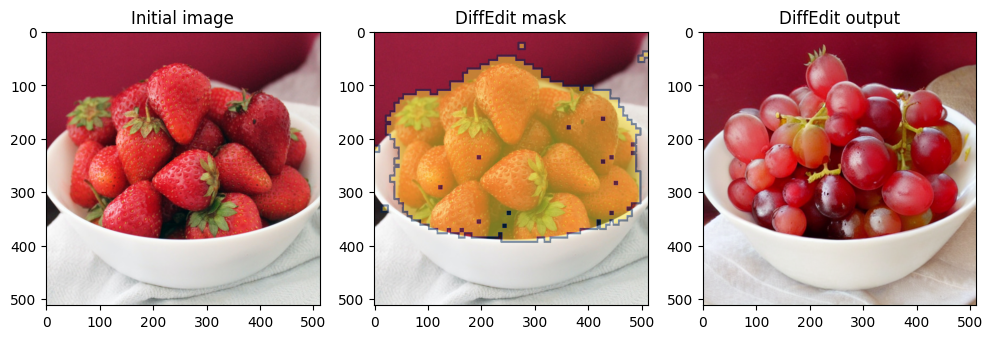

In [26]:
p = FastDownload().download('https://raw.githubusercontent.com/johnrobinsn/diffusion_experiments/main/images/bowloberries_scaled.jpg')
init_img = load_image(p)
mask, output = diffEdit(
  init_img, 
  rp = ['Bowl of Strawberries'], 
  qp=['Bowl of Grapes']
)
plot_diffEdit(init_img, output, mask)